# Project Title : Prediction-of-Calories-Burnt using Machine Learning 
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. Gender

## DISCRETE: 
2. User_ID
3. Age
4. Height
5. Weight
6. Duration
7. Heart_Rate
 

## Continuoue
8. Body_Temp
9. Calories

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
from sklearn.metrics import r2_score,classification_report 

In [12]:
import xgboost as xgb

In [13]:
from sklearn.model_selection import KFold,cross_val_score

In [14]:
calories_df=pd.read_csv('calories.csv')


In [15]:
calories_df

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [16]:
exercise_df=pd.read_csv('exercise.csv')

In [17]:
exercise_df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [18]:
df=exercise_df.merge(calories_df,how="inner")


In [19]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [20]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [22]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

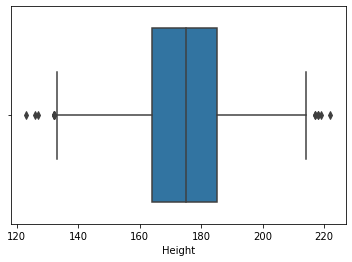

In [23]:
sns.boxplot(df['Height'])

In [24]:
q1=df['Height'].quantile(0.25)

In [25]:
q3=df['Height'].quantile(0.75)

In [26]:
IQR=q3-q1

In [27]:
lower=q1-1.5*IQR

In [28]:
higher=q3+1.5*IQR

In [29]:
df=df[(df['Height']>lower) & (df['Height']<higher)]

In [30]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Heart_Rate'>

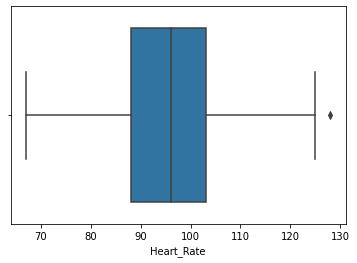

In [31]:
sns.boxplot(df['Heart_Rate'])

In [32]:
q1=df['Heart_Rate'].quantile(0.25)

In [33]:
q3=df['Heart_Rate'].quantile(0.75)

In [34]:
IQR=q3-q1

In [35]:
lower=q1-1.5*IQR

In [36]:
higher=q3+1.5*IQR

In [37]:
df=df[(df['Heart_Rate']>lower) & (df['Heart_Rate']<higher)]

In [38]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

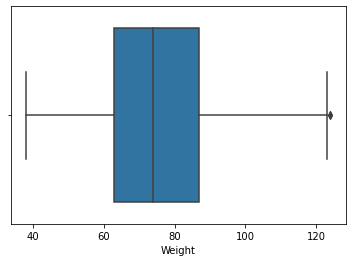

In [39]:
sns.boxplot(df['Weight'])

In [40]:
q1=df['Weight'].quantile(0.25)

In [41]:
q3=df['Weight'].quantile(0.75)

In [42]:
IQR=q3-q1

In [43]:
lower=q1-1.5*IQR

In [44]:
higher=q3+1.5*IQR

In [45]:
df=df[(df['Weight']>lower) & (df['Weight']<higher)]

In [46]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration'>

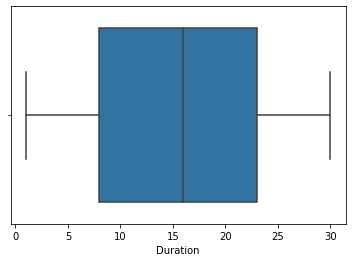

In [47]:
sns.boxplot(df['Duration'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Body_Temp'>

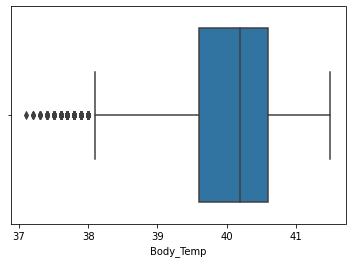

In [48]:
sns.boxplot(df['Body_Temp'])

In [49]:
q1=df['Body_Temp'].quantile(0.25)

In [50]:
q3=df['Body_Temp'].quantile(0.75)

In [51]:
IQR=q3-q1

In [52]:
lower=q1-1.5*IQR

In [53]:
higher=q3+1.5*IQR

In [54]:
df=df[(df['Body_Temp']>lower) & (df['Body_Temp']<higher)]

In [55]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

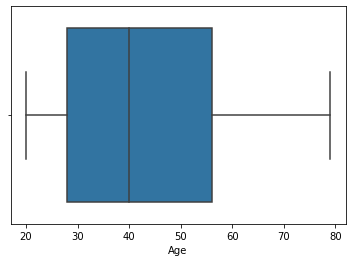

In [56]:
sns.boxplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='User_ID'>

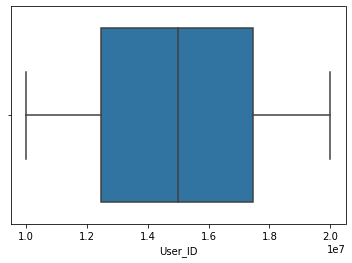

In [57]:
sns.boxplot(df['User_ID'])

In [58]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


<AxesSubplot:xlabel='Duration', ylabel='Heart_Rate'>

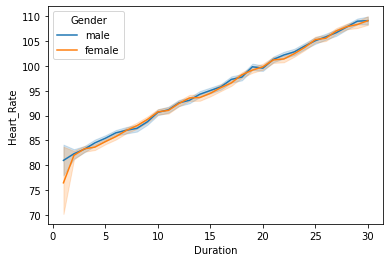

In [59]:
sns.lineplot(x=df['Duration'],y=df['Heart_Rate'],hue=df['Gender'])

# Observations:
1. As the duration of work out increases Heart_Rate also increases

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

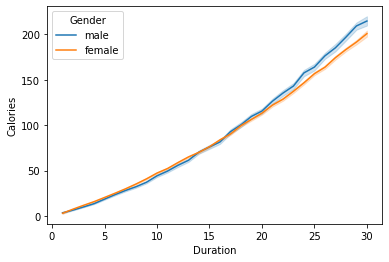

In [60]:
sns.lineplot(x=df['Duration'],y=df['Calories'],hue=df['Gender'])

# Observations:
1. As the duration of work out increases Calories also increases

<AxesSubplot:xlabel='Duration', ylabel='Body_Temp'>

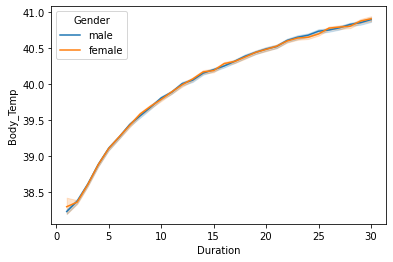

In [61]:
sns.lineplot(x=df['Duration'],y=df['Body_Temp'],hue=df['Gender'])

# Observations:
1. As the duration of work out increases Body Temperature also increases

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

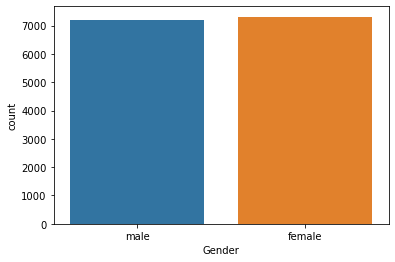

In [62]:
sns.countplot(df['Gender'])

In [63]:
label_df=df.groupby('Gender').size().index


In [64]:
val_df=df.groupby('Gender').size().values


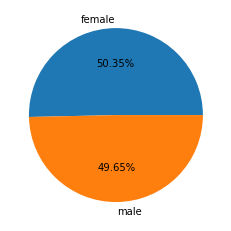

In [65]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Duration'>

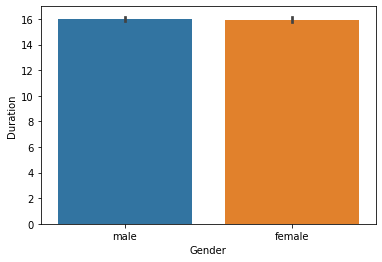

In [66]:
sns.barplot(x=df['Gender'],y=df['Duration'])

In [67]:
label_df=df.groupby('Gender')['Duration'].mean().index


In [68]:
val_df=df.groupby('Gender')['Duration'].mean().values


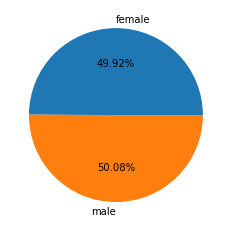

In [69]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Heart_Rate'>

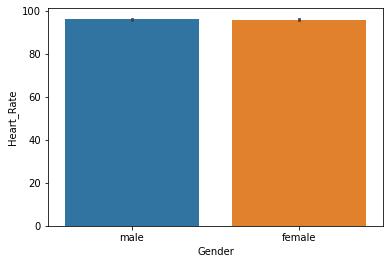

In [70]:
sns.barplot(x=df['Gender'],y=df['Heart_Rate'])

In [71]:
label_df=df.groupby('Gender')['Heart_Rate'].mean().index


In [72]:
val_df=df.groupby('Gender')['Heart_Rate'].mean().values


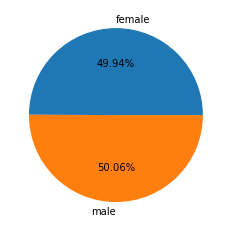

In [73]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Body_Temp'>

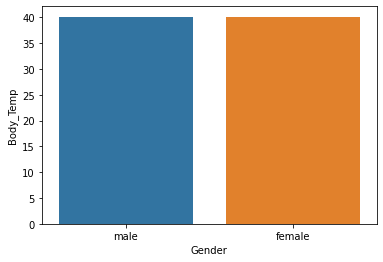

In [74]:
sns.barplot(x=df['Gender'],y=df['Body_Temp'])

In [75]:
label_df=df.groupby('Gender')['Body_Temp'].mean().index


In [76]:
val_df=df.groupby('Gender')['Body_Temp'].mean().values


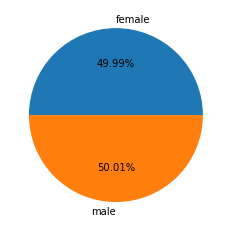

In [77]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Age'>

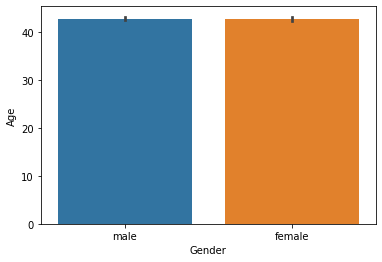

In [78]:
sns.barplot(x=df['Gender'],y=df['Age'])

In [79]:
label_df=df.groupby('Gender')['Age'].mean().index


In [80]:
val_df=df.groupby('Gender')['Age'].mean().values


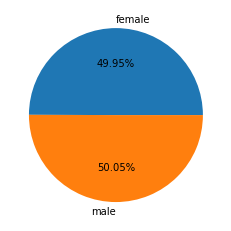

In [81]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [82]:
label_df=df.groupby('Gender')['Body_Temp'].mean().index


In [83]:
val_df=df.groupby('Gender')['Body_Temp'].mean().values

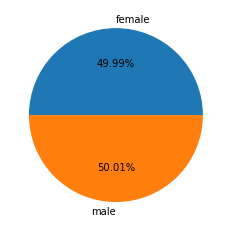

In [84]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Body_Temp'>

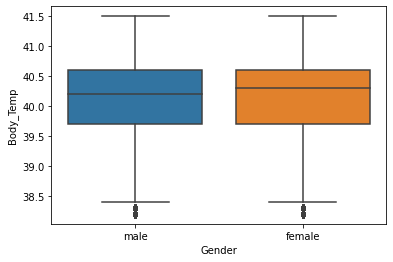

In [85]:
sns.boxplot(x=df['Gender'],y=df['Body_Temp'])

<AxesSubplot:xlabel='Gender', ylabel='Heart_Rate'>

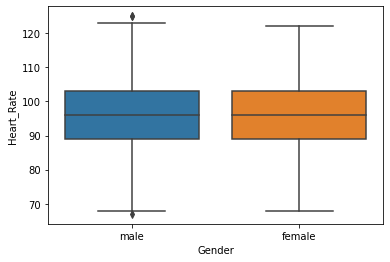

In [86]:
sns.boxplot(x=df['Gender'],y=df['Heart_Rate'])

<AxesSubplot:xlabel='Gender', ylabel='Duration'>

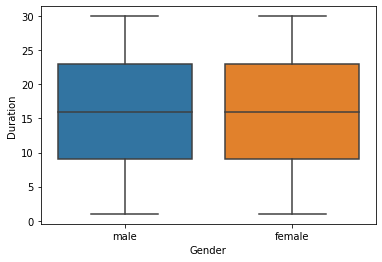

In [87]:
sns.boxplot(x=df['Gender'],y=df['Duration'])

<AxesSubplot:xlabel='Gender', ylabel='Height'>

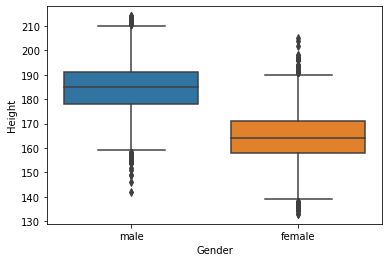

In [88]:
sns.boxplot(x=df['Gender'],y=df['Height'])

<AxesSubplot:xlabel='Gender', ylabel='Weight'>

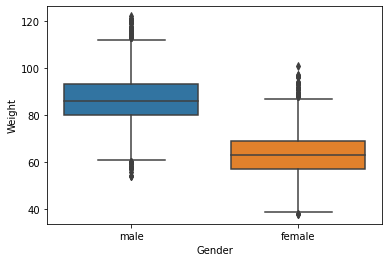

In [89]:
sns.boxplot(x=df['Gender'],y=df['Weight'])

<AxesSubplot:xlabel='Gender', ylabel='Calories'>

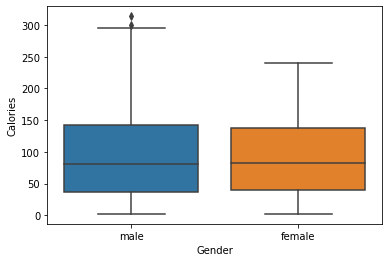

In [90]:
sns.boxplot(x=df['Gender'],y=df['Calories'])

In [91]:
label_df=df.groupby(['Gender','Age','Height','Weight'])['Calories'].mean().sort_values(ascending=False).index


In [92]:
val_df=df.groupby(['Gender','Age','Height','Weight'])['Calories'].mean().sort_values(ascending=False).values


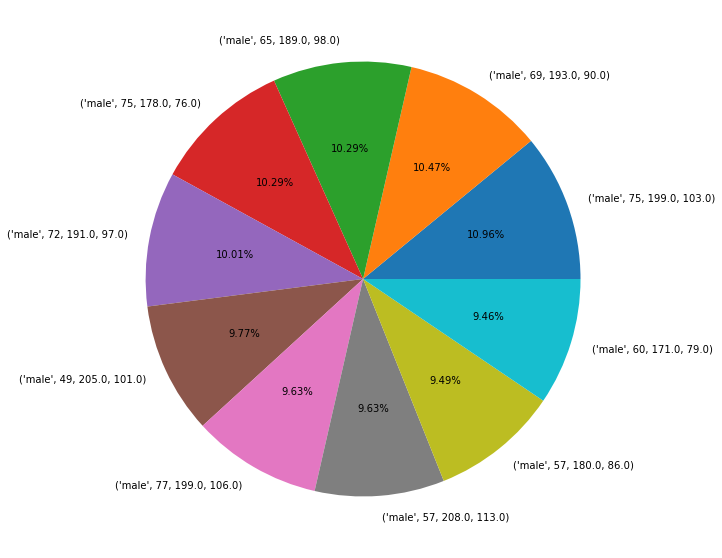

In [93]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [94]:
label_df=df.groupby(['Gender','Age','Height','Weight'])['Body_Temp'].mean().sort_values(ascending=False).index


In [95]:
val_df=df.groupby(['Gender','Age','Height','Weight'])['Body_Temp'].mean().sort_values(ascending=False).values


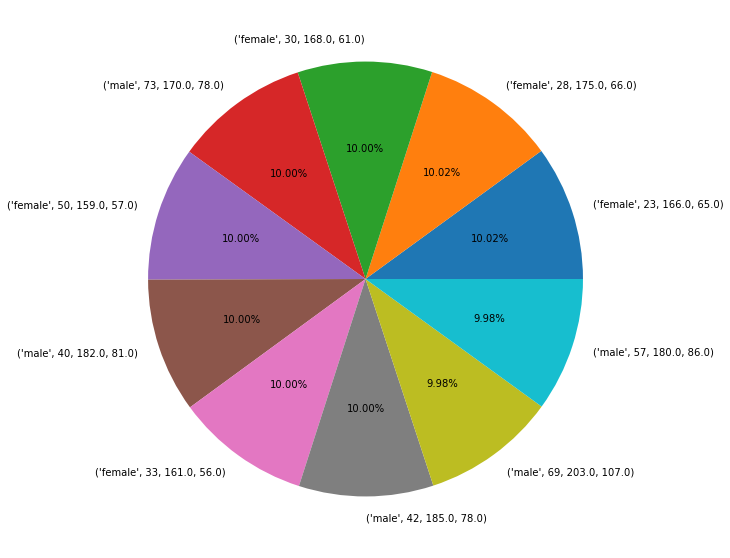

In [96]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [97]:
label_df=df.groupby(['Gender','Age','Height','Weight'])['Heart_Rate'].mean().sort_values(ascending=False).index


In [98]:
val_df=df.groupby(['Gender','Age','Height','Weight'])['Heart_Rate'].mean().sort_values(ascending=False).values


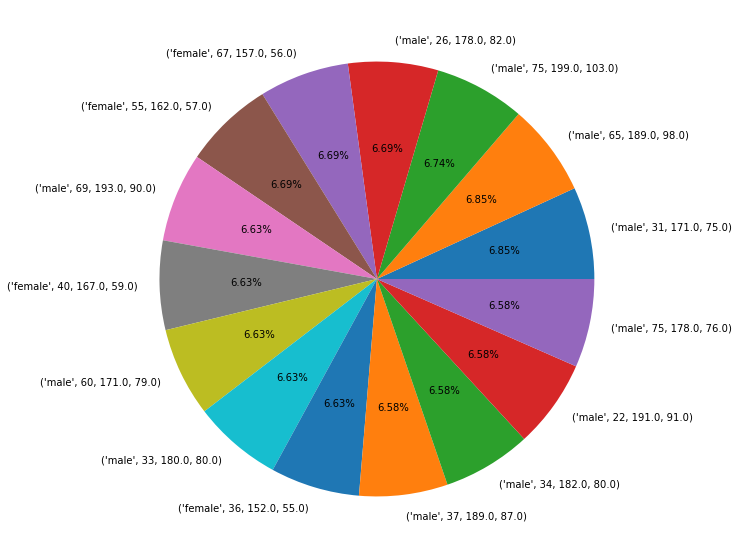

In [99]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:15],labels=label_df[:15],autopct="%1.2f%%")
plt.show()

In [100]:
label_df=df.groupby(['Gender','Age'])['Duration'].mean().sort_values(ascending=False).index


In [101]:
val_df=df.groupby(['Gender','Age'])['Duration'].mean().sort_values(ascending=False).values


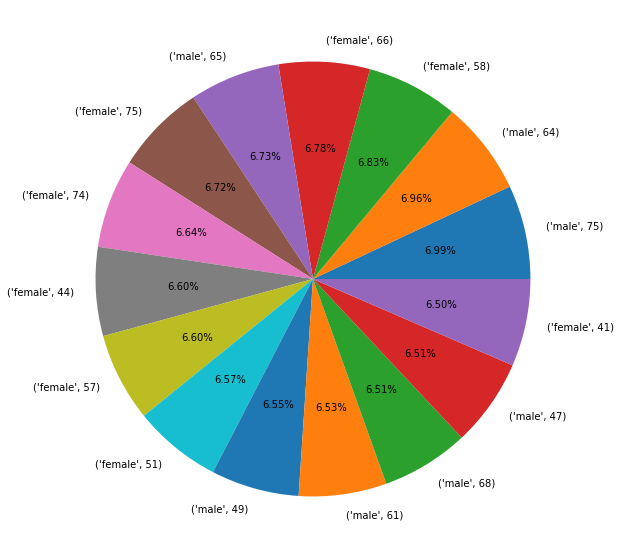

In [102]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:15],labels=label_df[:15],autopct="%1.2f%%")
plt.show()

In [103]:
label_df=df.groupby(['Gender','Age'])['Heart_Rate'].mean().sort_values(ascending=False).index


In [104]:
val_df=df.groupby(['Gender','Age'])['Heart_Rate'].mean().sort_values(ascending=False).values


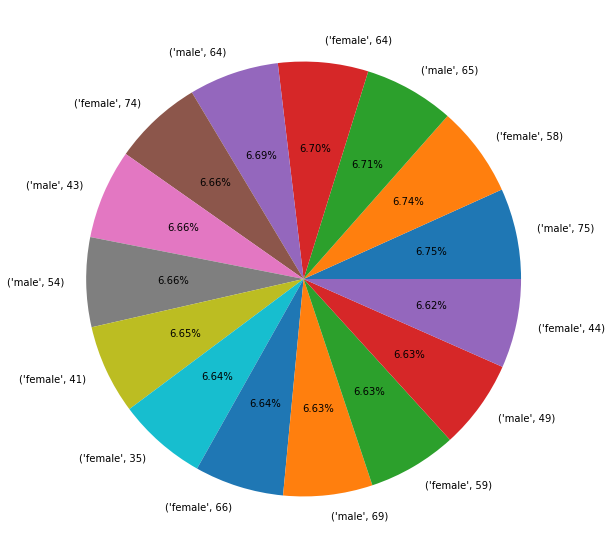

In [105]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:15],labels=label_df[:15],autopct="%1.2f%%")
plt.show()

In [106]:
label_df=df.groupby(['Gender','Age'])['Calories'].mean().sort_values(ascending=False).index


In [107]:
val_df=df.groupby(['Gender','Age'])['Calories'].mean().sort_values(ascending=False).values


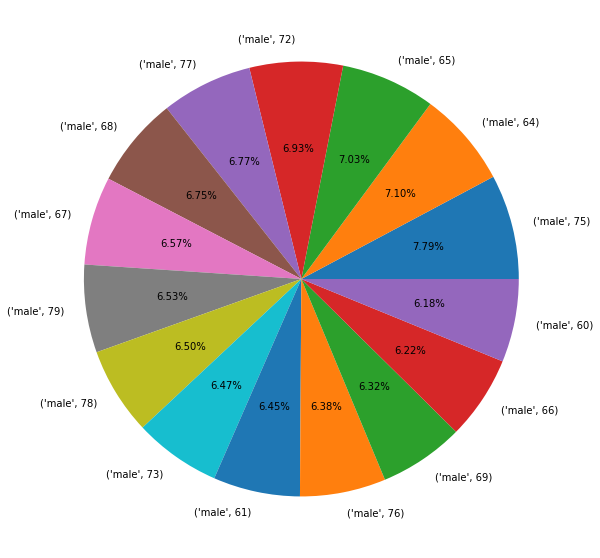

In [108]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:15],labels=label_df[:15],autopct="%1.2f%%")
plt.show()

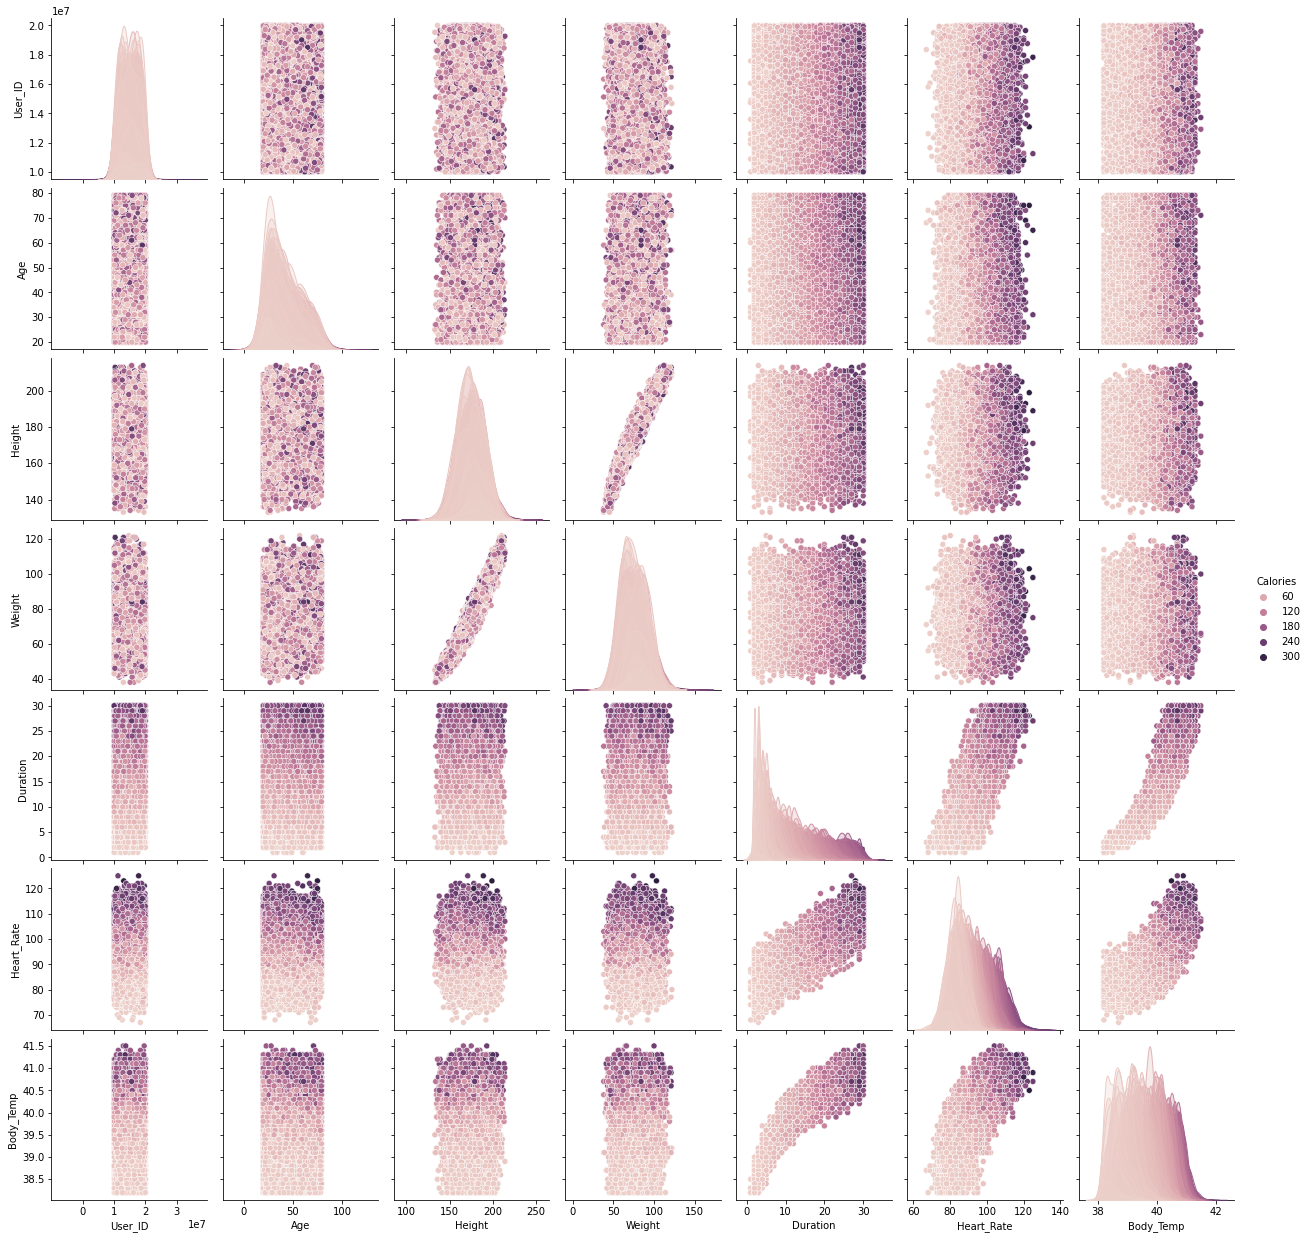

In [109]:
sns.pairplot(df,hue='Calories')

<AxesSubplot:>

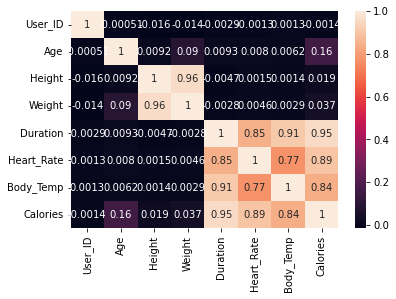

In [110]:
sns.heatmap(df.corr(),annot=True)

In [111]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

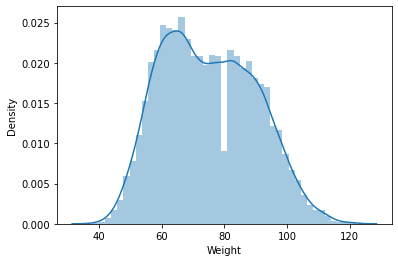

In [112]:
sns.distplot(df['Weight'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

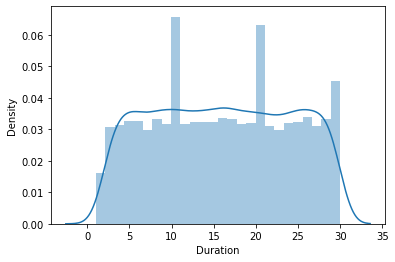

In [113]:
sns.distplot(df['Duration'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

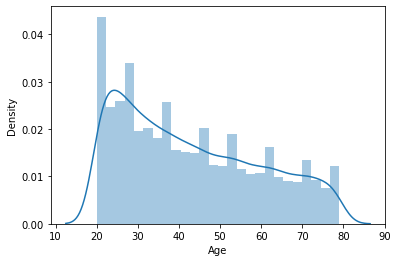

In [114]:
sns.distplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='User_ID', ylabel='Density'>

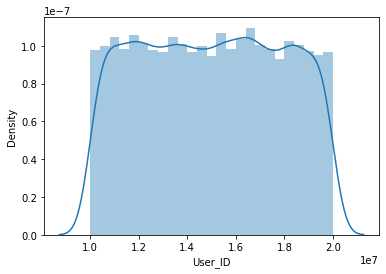

In [115]:
sns.distplot(df['User_ID'])

In [116]:
le=LabelEncoder()


In [117]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [118]:
df['Age_Range']=pd.qcut(df['Age'],5)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_18716\3781337548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Range']=pd.qcut(df['Age'],5)


In [119]:
df['Weight_Range']=pd.qcut(df['Weight'],5)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_18716\793284811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight_Range']=pd.qcut(df['Weight'],5)


In [120]:
df['Calories_Range']=pd.qcut(df['Calories'],5)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_18716\1890401386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calories_Range']=pd.qcut(df['Calories'],5)


In [121]:
df['Duration_Range']=pd.qcut(df['Duration'],5)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_18716\816946703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_Range']=pd.qcut(df['Duration'],5)


In [122]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Range,Weight_Range,Calories_Range,Duration_Range
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,"(60.0, 79.0]","(89.0, 122.0]","(152.0, 314.0]","(24.0, 30.0]"
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,"(19.999, 26.0]","(37.999, 61.0]","(63.0, 104.0]","(13.0, 19.0]"
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,"(60.0, 79.0]","(69.0, 79.0]","(1.999, 31.0]","(0.999, 8.0]"
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,"(26.0, 34.0]","(69.0, 79.0]","(63.0, 104.0]","(8.0, 13.0]"
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,"(26.0, 34.0]","(37.999, 61.0]","(31.0, 63.0]","(8.0, 13.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0,"(19.999, 26.0]","(79.0, 89.0]","(31.0, 63.0]","(8.0, 13.0]"
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0,"(26.0, 34.0]","(61.0, 69.0]","(1.999, 31.0]","(0.999, 8.0]"
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0,"(34.0, 45.0]","(37.999, 61.0]","(63.0, 104.0]","(13.0, 19.0]"
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0,"(60.0, 79.0]","(89.0, 122.0]","(1.999, 31.0]","(0.999, 8.0]"


<AxesSubplot:xlabel='Duration_Range', ylabel='count'>

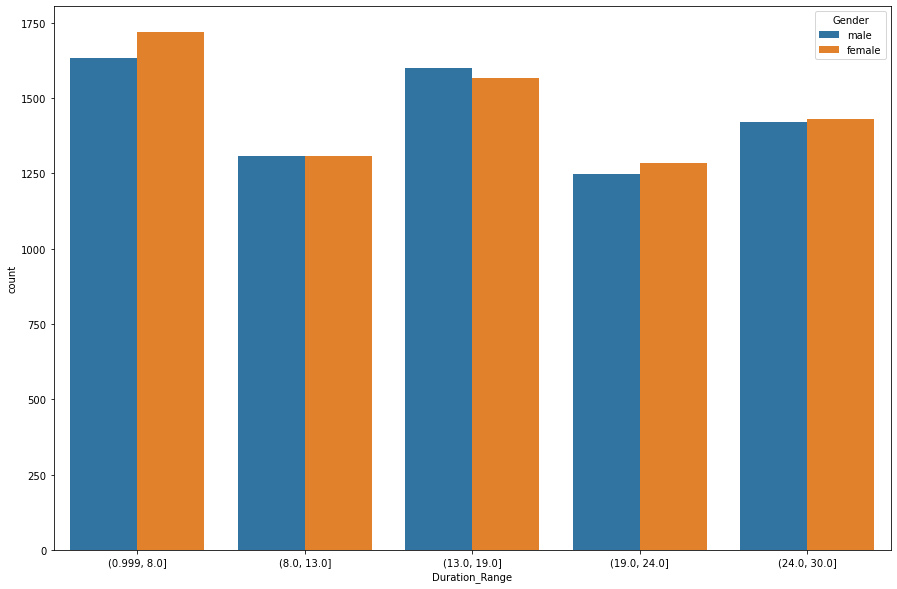

In [123]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Duration_Range'],hue=df['Gender'])

In [124]:
label_df=df.groupby(['Duration_Range','Gender']).size().sort_values(ascending=False).index


In [125]:
label_df

MultiIndex([((0.999, 8.0], 'female'),
            ((0.999, 8.0],   'male'),
            ((13.0, 19.0],   'male'),
            ((13.0, 19.0], 'female'),
            ((24.0, 30.0], 'female'),
            ((24.0, 30.0],   'male'),
            ( (8.0, 13.0], 'female'),
            ( (8.0, 13.0],   'male'),
            ((19.0, 24.0], 'female'),
            ((19.0, 24.0],   'male')],
           names=['Duration_Range', 'Gender'])

In [126]:
val_df=df.groupby(['Duration_Range','Gender']).size().sort_values(ascending=False).values


In [127]:
val_df

array([1719, 1634, 1600, 1568, 1430, 1420, 1309, 1308, 1286, 1249],
      dtype=int64)

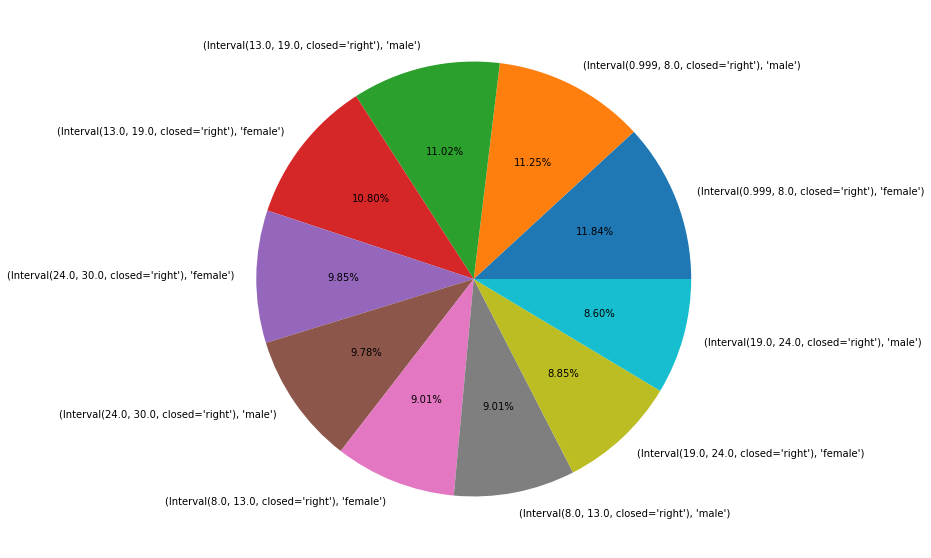

In [128]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Duration_Range', ylabel='Calories'>

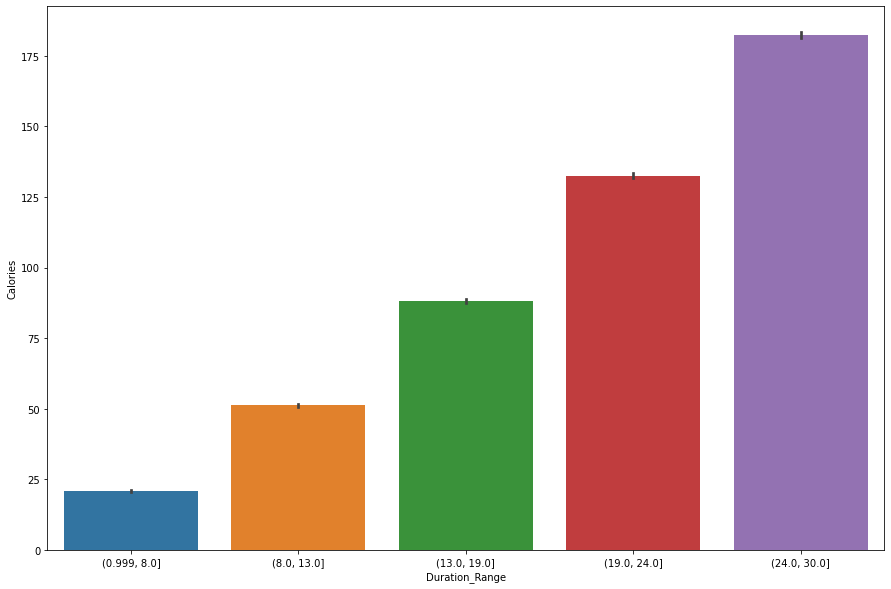

In [129]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Duration_Range'],y=df['Calories'])

In [130]:
label_df=df.groupby('Duration_Range')['Calories'].mean().sort_values(ascending=False).index


In [131]:
val_df=df.groupby('Duration_Range')['Calories'].mean().sort_values(ascending=False).values


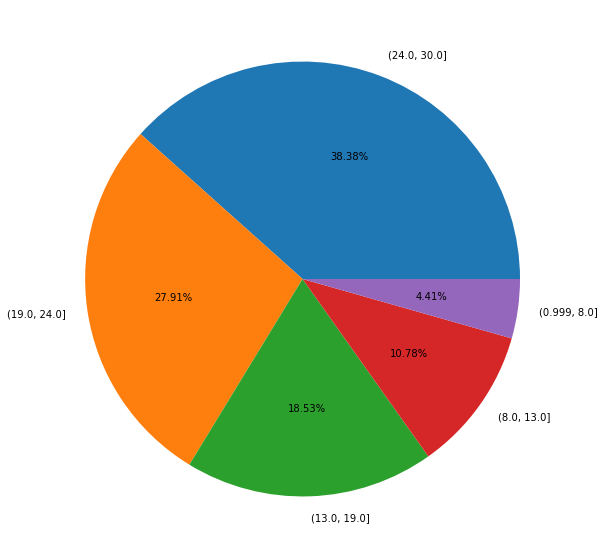

In [132]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:15],labels=label_df[:15],autopct="%1.2f%%")
plt.show()

In [133]:
df.groupby('Duration_Range')['Calories'].mean().sort_values(ascending=False)

Duration_Range
(24.0, 30.0]    182.359649
(19.0, 24.0]    132.586193
(13.0, 19.0]     88.022096
(8.0, 13.0]      51.212839
(0.999, 8.0]     20.932001
Name: Calories, dtype: float64

# Observations:
1. Person who do exercise between 19 to 24 minutes loose maximum calories.
2. Person who do exercise between 0.999 to 8 minutes loose minimum calories.



<AxesSubplot:xlabel='Duration_Range', ylabel='Calories'>

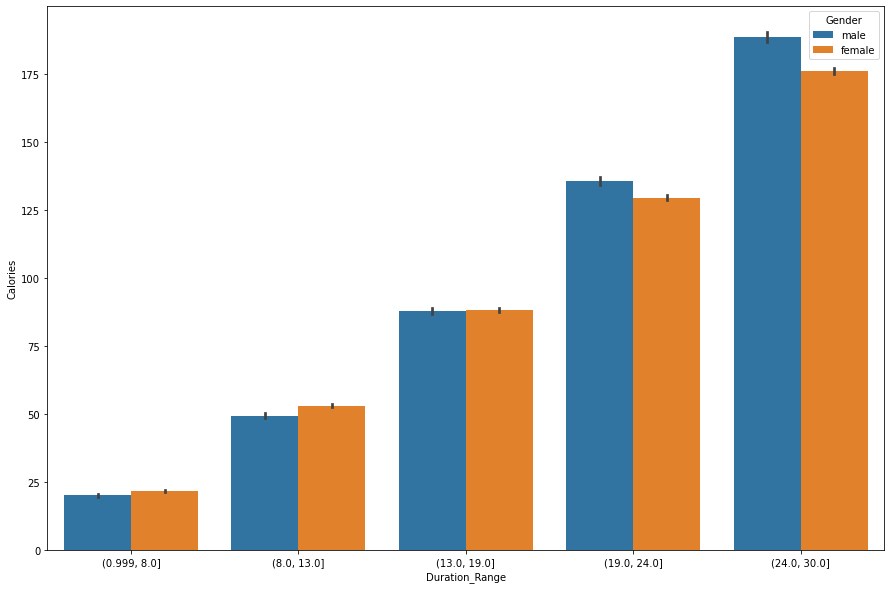

In [134]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Duration_Range'],y=df['Calories'],hue=df['Gender'])

In [135]:
label_df=df.groupby(['Duration_Range','Gender'])['Calories'].mean().sort_values(ascending=False).index


In [136]:
val_df=df.groupby(['Duration_Range','Gender'])['Calories'].mean().sort_values(ascending=False).values


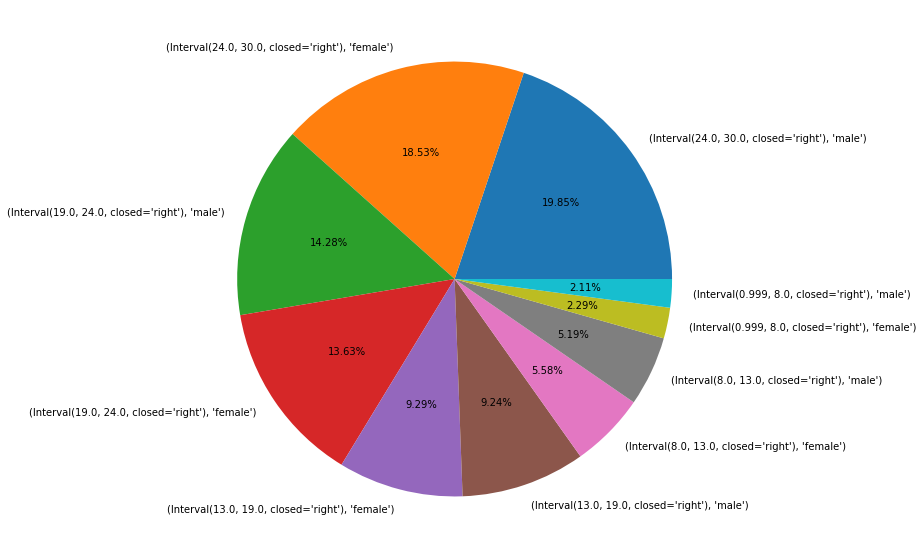

In [137]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:15],labels=label_df[:15],autopct="%1.2f%%")
plt.show()

# Observations:
1. Person who do exercise between 24 to 30 minutes loose maximum calories.
2. Person who do exercise between 0.999 to 8 minutes loose minimum calories.



In [138]:
df.groupby(['Duration_Range','Gender'])['Calories'].mean().sort_values(ascending=False)

Duration_Range  Gender
(24.0, 30.0]    male      188.631690
                female    176.131469
(19.0, 24.0]    male      135.715773
                female    129.546656
(13.0, 19.0]    female     88.277423
                male       87.771875
(8.0, 13.0]     female     53.073338
                male       49.350917
(0.999, 8.0]    female     21.729494
                male       20.093023
Name: Calories, dtype: float64

<AxesSubplot:xlabel='Duration_Range', ylabel='count'>

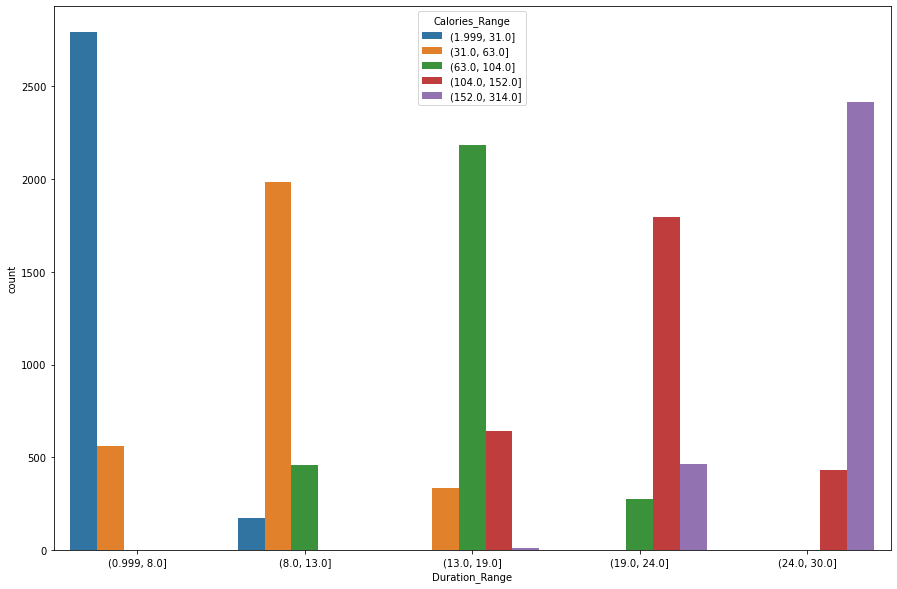

In [139]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Duration_Range'],hue=df['Calories_Range'])

# Observations:
1. Persons who do work out between 0.999 hours and 8 hours burns maximum calories between 1.999 and 31.
2. Persons who do work out between 8 hours and 13 hours burns maximum calories between 31 and 63.
3. Persons who do work out between 13 hours and 19 hours burns maximum calories between 63 and 104.
4. Persons who do work out between 19 hours and 24 hours burns maximum calories between 104 and 152
5. Persons who do work out between 24 hours and 30 hours burns maximum calories between 152 and 314.



In [140]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Range,Weight_Range,Calories_Range,Duration_Range
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,"(60.0, 79.0]","(89.0, 122.0]","(152.0, 314.0]","(24.0, 30.0]"
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,"(19.999, 26.0]","(37.999, 61.0]","(63.0, 104.0]","(13.0, 19.0]"
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,"(60.0, 79.0]","(69.0, 79.0]","(1.999, 31.0]","(0.999, 8.0]"
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,"(26.0, 34.0]","(69.0, 79.0]","(63.0, 104.0]","(8.0, 13.0]"
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,"(26.0, 34.0]","(37.999, 61.0]","(31.0, 63.0]","(8.0, 13.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0,"(19.999, 26.0]","(79.0, 89.0]","(31.0, 63.0]","(8.0, 13.0]"
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0,"(26.0, 34.0]","(61.0, 69.0]","(1.999, 31.0]","(0.999, 8.0]"
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0,"(34.0, 45.0]","(37.999, 61.0]","(63.0, 104.0]","(13.0, 19.0]"
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0,"(60.0, 79.0]","(89.0, 122.0]","(1.999, 31.0]","(0.999, 8.0]"


<AxesSubplot:xlabel='Age_Range', ylabel='Calories'>

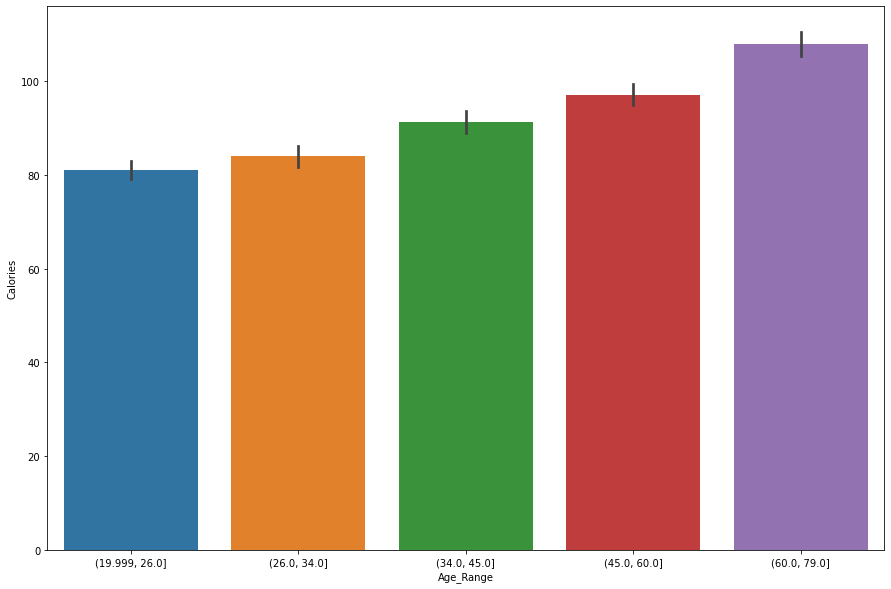

In [141]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Age_Range'],y=df['Calories'])

# Observations:
1. Person whoes age is between 60 to 79 years burn maximum calories.
2. Person whoes age is between 19.999 to 26 years burn minimum calories.




<AxesSubplot:xlabel='Age_Range', ylabel='Calories'>

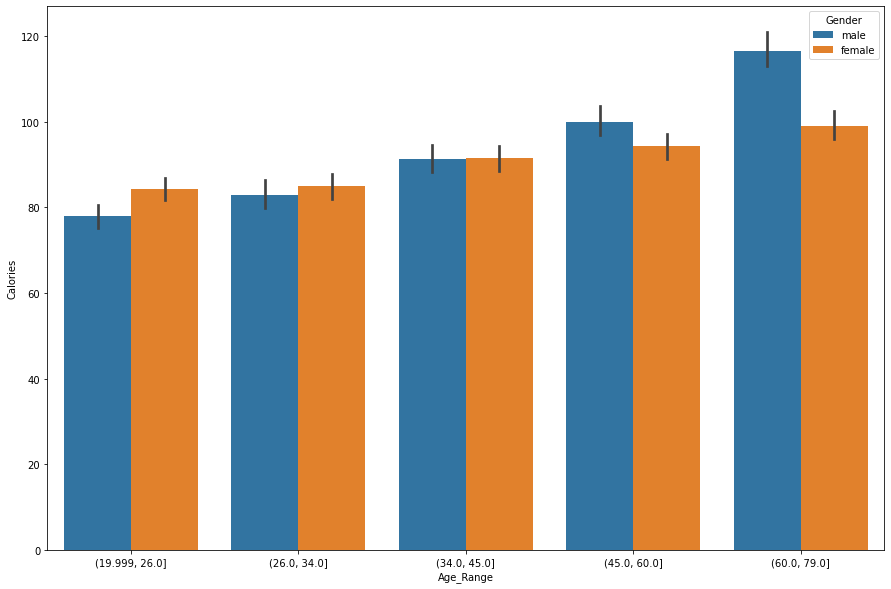

In [142]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Age_Range'],y=df['Calories'],hue=df['Gender'])

# Observations:
1. Male and Female Persons whoes age is between 60 to 79 years burn maximum calories.
2. Male and Female Persons whoes age is between 19.999 to 26 years burn minimum calories.




C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_Range', ylabel='count'>

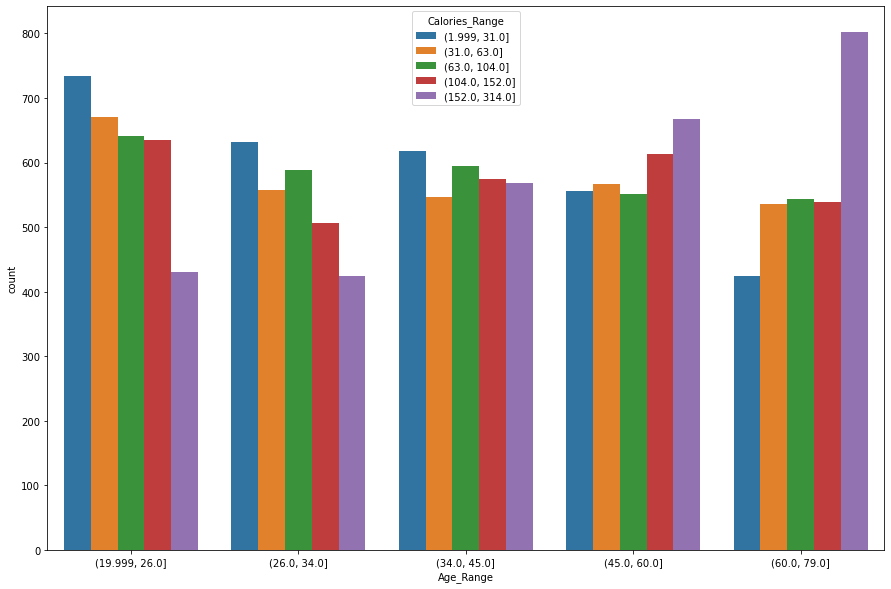

In [143]:
plt.figure(figsize=(15,10))
sns.countplot(df['Age_Range'],hue=df['Calories_Range'])

# Observations:
1. Persons whoes age is between 60 and 79 years burn maximum calories between 152 and 314.
2. Persons whoes age is between 19.999 to 26 years burn maximum calories between 1.999 to 31.
3. Persons whoes age is between 26 and 34 years burn maximum calories between 1.9999 and 31
4. Persons whoes age is between 34 and 45 years burn maximum calories between 1.999 to 31.
5. Persons whoes age is between 45 and 60 years burn maximum calories between 152 and 314.



In [144]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Range,Weight_Range,Calories_Range,Duration_Range
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,"(60.0, 79.0]","(89.0, 122.0]","(152.0, 314.0]","(24.0, 30.0]"
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,"(19.999, 26.0]","(37.999, 61.0]","(63.0, 104.0]","(13.0, 19.0]"
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,"(60.0, 79.0]","(69.0, 79.0]","(1.999, 31.0]","(0.999, 8.0]"
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,"(26.0, 34.0]","(69.0, 79.0]","(63.0, 104.0]","(8.0, 13.0]"
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,"(26.0, 34.0]","(37.999, 61.0]","(31.0, 63.0]","(8.0, 13.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0,"(19.999, 26.0]","(79.0, 89.0]","(31.0, 63.0]","(8.0, 13.0]"
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0,"(26.0, 34.0]","(61.0, 69.0]","(1.999, 31.0]","(0.999, 8.0]"
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0,"(34.0, 45.0]","(37.999, 61.0]","(63.0, 104.0]","(13.0, 19.0]"
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0,"(60.0, 79.0]","(89.0, 122.0]","(1.999, 31.0]","(0.999, 8.0]"


<AxesSubplot:xlabel='Weight_Range', ylabel='Calories'>

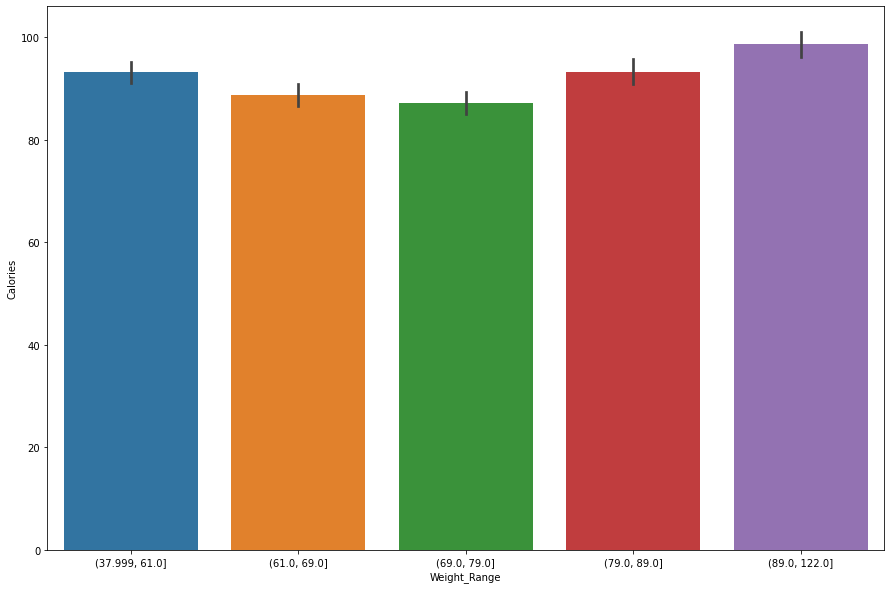

In [145]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Weight_Range'],y=df['Calories'])

In [146]:
df.groupby('Weight_Range')['Calories'].mean()

Weight_Range
(37.999, 61.0]    93.135390
(61.0, 69.0]      88.794918
(69.0, 79.0]      87.146416
(79.0, 89.0]      93.236160
(89.0, 122.0]     98.657764
Name: Calories, dtype: float64

# Observations:
1. Persons whoes weight range is between 89 to 122  burn maximum avg calories.
2. Persons whoes weight range is between 69 to 79  burn minimum avg calories.

<AxesSubplot:xlabel='Weight_Range', ylabel='Calories'>

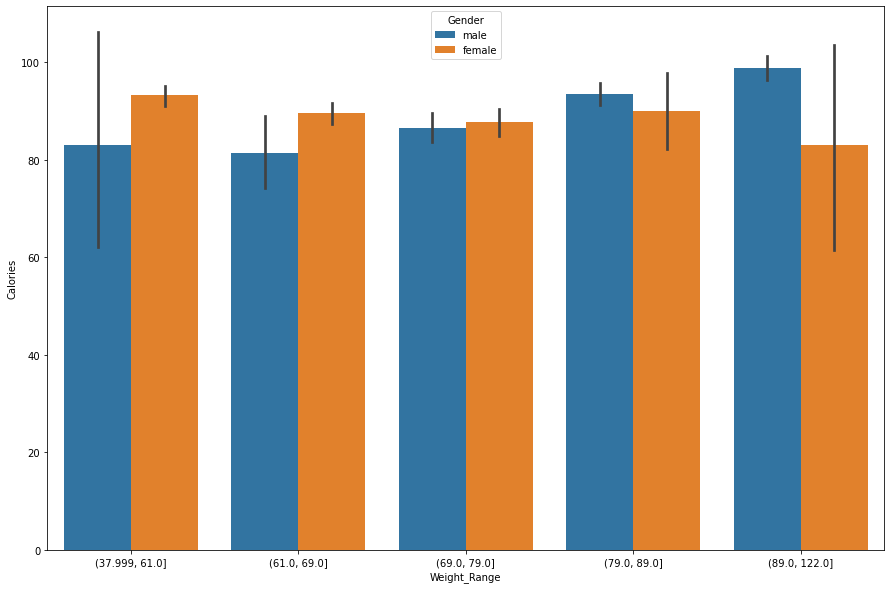

In [147]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Weight_Range'],y=df['Calories'],hue=df['Gender'])

In [148]:
df.groupby(['Weight_Range','Gender'])['Calories'].mean()

Weight_Range    Gender
(37.999, 61.0]  female    93.214535
                male      83.160000
(61.0, 69.0]    female    89.539568
                male      81.430830
(69.0, 79.0]    female    87.760642
                male      86.558450
(79.0, 89.0]    female    90.029268
                male      93.484334
(89.0, 122.0]   female    83.142857
                male      98.774668
Name: Calories, dtype: float64

# Observations:
1. Male Persons whoes weight range is between 89 to 122  burn maximum avg calories.
2. Female Persons whoes weight range is between 37.999 to 61  burn maximum avg calories.
3. Male Persons whoes weight range is between 61 to 69  burn minimum avg calories.
4. Female Persons whoes weight range is between 89 to 122  burn minimum avg calories.


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight_Range', ylabel='count'>

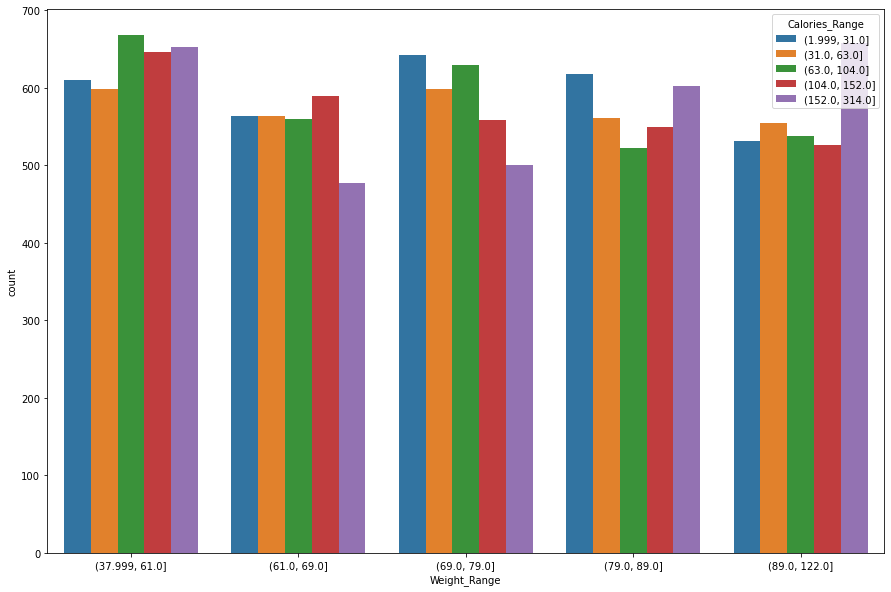

In [149]:
plt.figure(figsize=(15,10))
sns.countplot(df['Weight_Range'],hue=df['Calories_Range'])

# Observations:
1. Persons whoes weight range is between 37.999 and 61  burn maximum calories between 63 and 104.
2. Persons whoes weight range is between 61 and 69 burn maximum calories between 104 and 152.
3. Persons whoes weight range is between 69 and 79 burn maximum calories between 1.999 and 31.
4. Persons whoes weight range is between 79 and 89 burn maximum calories between 1.999 and 31.
5. Persons whoes weight range is between 89 and 122 burn maximum calories between 152 and 314.

In [150]:
df['Gender']=le.fit_transform(df['Gender'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_18716\536352534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=le.fit_transform(df['Gender'])


In [151]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Range,Weight_Range,Calories_Range,Duration_Range
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0,"(60.0, 79.0]","(89.0, 122.0]","(152.0, 314.0]","(24.0, 30.0]"
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0,"(19.999, 26.0]","(37.999, 61.0]","(63.0, 104.0]","(13.0, 19.0]"
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0,"(60.0, 79.0]","(69.0, 79.0]","(1.999, 31.0]","(0.999, 8.0]"
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0,"(26.0, 34.0]","(69.0, 79.0]","(63.0, 104.0]","(8.0, 13.0]"
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0,"(26.0, 34.0]","(37.999, 61.0]","(31.0, 63.0]","(8.0, 13.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0,"(19.999, 26.0]","(79.0, 89.0]","(31.0, 63.0]","(8.0, 13.0]"
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0,"(26.0, 34.0]","(61.0, 69.0]","(1.999, 31.0]","(0.999, 8.0]"
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0,"(34.0, 45.0]","(37.999, 61.0]","(63.0, 104.0]","(13.0, 19.0]"
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0,"(60.0, 79.0]","(89.0, 122.0]","(1.999, 31.0]","(0.999, 8.0]"


In [152]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Range,Weight_Range,Calories_Range,Duration_Range
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0,"(60.0, 79.0]","(89.0, 122.0]","(152.0, 314.0]","(24.0, 30.0]"
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0,"(19.999, 26.0]","(37.999, 61.0]","(63.0, 104.0]","(13.0, 19.0]"
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0,"(60.0, 79.0]","(69.0, 79.0]","(1.999, 31.0]","(0.999, 8.0]"
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0,"(26.0, 34.0]","(69.0, 79.0]","(63.0, 104.0]","(8.0, 13.0]"
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0,"(26.0, 34.0]","(37.999, 61.0]","(31.0, 63.0]","(8.0, 13.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0,"(19.999, 26.0]","(79.0, 89.0]","(31.0, 63.0]","(8.0, 13.0]"
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0,"(26.0, 34.0]","(61.0, 69.0]","(1.999, 31.0]","(0.999, 8.0]"
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0,"(34.0, 45.0]","(37.999, 61.0]","(63.0, 104.0]","(13.0, 19.0]"
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0,"(60.0, 79.0]","(89.0, 122.0]","(1.999, 31.0]","(0.999, 8.0]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories_Range', ylabel='count'>

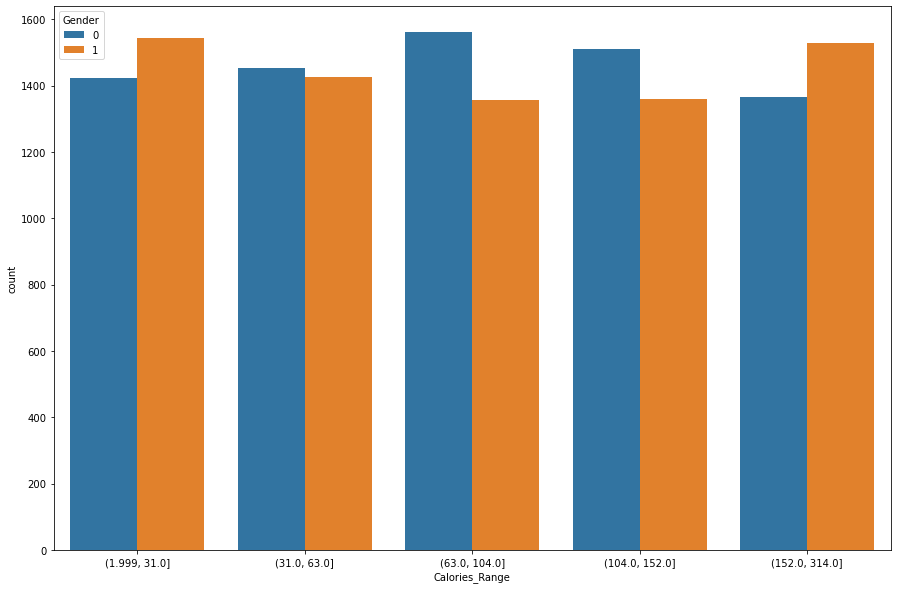

In [153]:
plt.figure(figsize=(15,10))
sns.countplot(df['Calories_Range'],hue=df['Gender'])

In [154]:
df.groupby(['Calories_Range','Gender']).size()

Calories_Range  Gender
(1.999, 31.0]   0         1423
                1         1542
(31.0, 63.0]    0         1453
                1         1425
(63.0, 104.0]   0         1561
                1         1358
(104.0, 152.0]  0         1510
                1         1359
(152.0, 314.0]  0         1365
                1         1527
dtype: int64

# Observations:
1. Female Persons whoes burns Calories between 63 to 104  is maximum.
2. Female Persons whoes burns Calories between 152 to 314  is minimum.
3. Male Persons whoes burns Calories between 1.999 to 31  is maximum.
4. Male Persons whoes burns Calories between 63 to 104  is minimum.



C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories_Range', ylabel='count'>

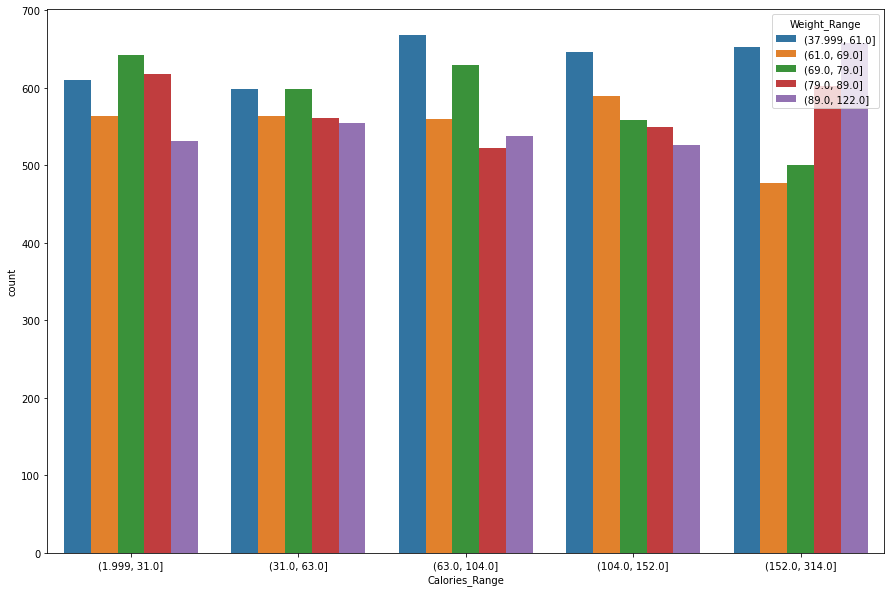

In [155]:
plt.figure(figsize=(15,10))
sns.countplot(df['Calories_Range'],hue=df['Weight_Range'])

# Observations:
1. Persons whoes Weight range is between 69 and 79  burn maximum calories between 69 and 79.
2. Persons whoes Weight range is between 37.999 and 61 burn maximum calories between 31 and 63.
3. Persons whoes Weight range is between 37.999 and 61 burn maximum calories between 63 and 104.
4. Persons whoes Weight range is between 37.999 and 61 burn maximum calories between 104 and 152.
5. Persons whoes Weight range is between 89 and 122 burn maximum calories between 152 and 314.

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories_Range', ylabel='count'>

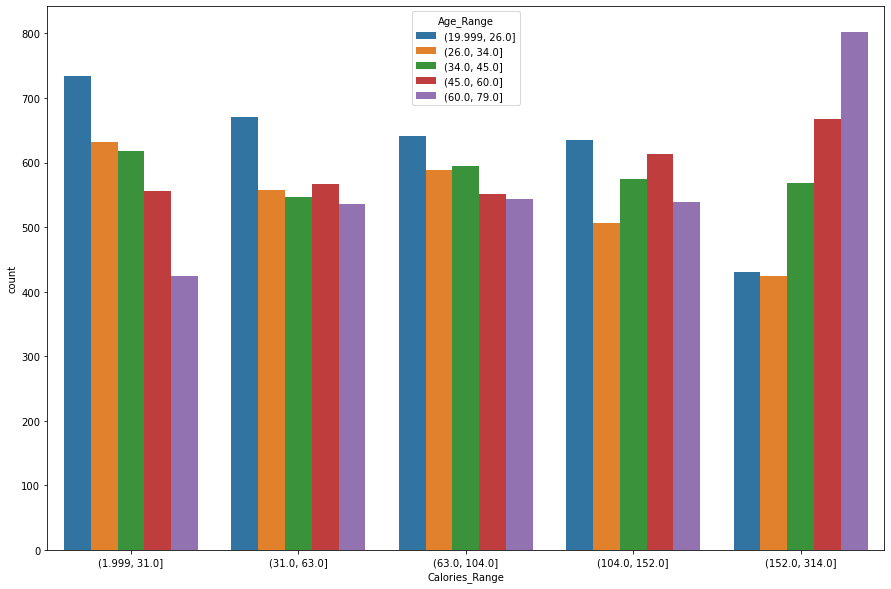

In [156]:
plt.figure(figsize=(15,10))
sns.countplot(df['Calories_Range'],hue=df['Age_Range'])

# Observations:
1. Persons whoes Age range is between 19.999 and 26 burn maximum calories between 1.999 and 31.
2. Persons whoes Age range is between 26 and 34 burn maximum calories between 1.999 and 31.
3. Persons whoes Age range is between 34 and 45 burn maximum calories between 1.999 and 31.
4. Persons whoes Age range is between 45 and 60 burn maximum calories between 152 and 314.
5. Persons whoes Age range is between 60 and 79 burn maximum calories between 152 and 314.

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories_Range', ylabel='count'>

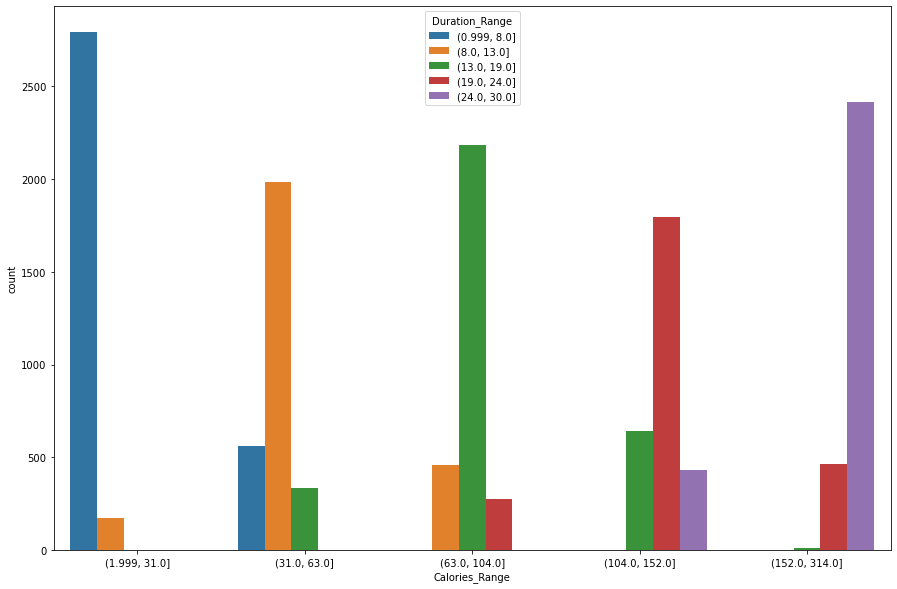

In [157]:
plt.figure(figsize=(15,10))
sns.countplot(df['Calories_Range'],hue=df['Duration_Range'])

# Observations:
1. Persons who do work out between 0.999 hours and 8 hours burns maximum calories between 1.999 and 31.
2. Persons who do work out between 8 hours and 13 hours burns maximum calories between 31 and 63.
3. Persons who do work out between 13 hours and 19 hours burns maximum calories between 63 and 104.
4. Persons who do work out between 19 hours and 24 hours burns maximum calories between 104 and 152
5. Persons who do work out between 24 hours and 30 hours burns maximum calories between 152 and 314.



<AxesSubplot:xlabel='Calories_Range', ylabel='Age'>

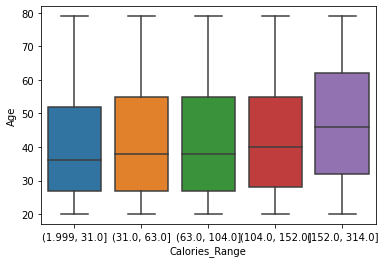

In [158]:
sns.boxplot(x=df['Calories_Range'],y=df['Age'])

In [159]:
df.groupby(['Calories_Range'])['Age'].mean()

Calories_Range
(1.999, 31.0]     40.212816
(31.0, 63.0]      42.024670
(63.0, 104.0]     42.112025
(104.0, 152.0]    42.595329
(152.0, 314.0]    47.282158
Name: Age, dtype: float64

# Observations:
1. Person with average age 47.28 burns maximum calories in the range of 152 and 314
2. Person with average age 40.21 burns minimum calories in the range of 63 and 104

<AxesSubplot:xlabel='Calories_Range', ylabel='Weight'>

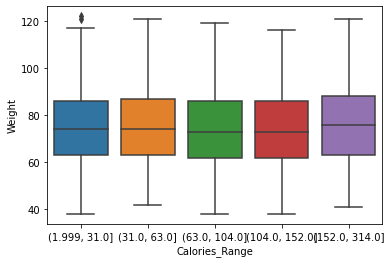

In [160]:
sns.boxplot(x=df['Calories_Range'],y=df['Weight'])

In [161]:
df.groupby(['Calories_Range'])['Weight'].mean()

Calories_Range
(1.999, 31.0]     75.046880
(31.0, 63.0]      75.029882
(63.0, 104.0]     74.367934
(104.0, 152.0]    74.428721
(152.0, 314.0]    75.956432
Name: Weight, dtype: float64

# Observations:
1. Person with average weight 74.36 burns minimum calories in the range of 63 and 104
2. Person with average weight 75.95 burns maximum calories in the range of 152 and 314

<AxesSubplot:xlabel='Calories_Range', ylabel='Duration'>

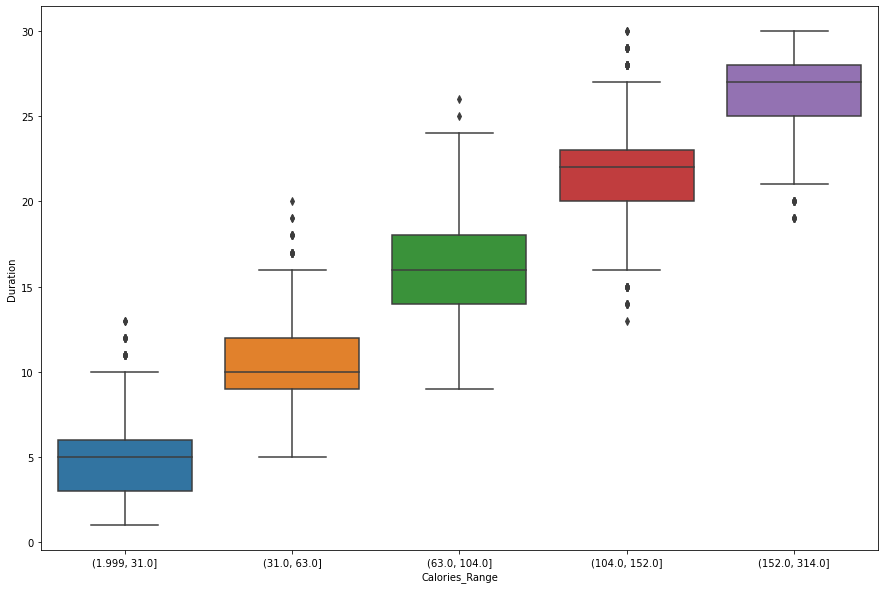

In [162]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['Calories_Range'],y=df['Duration'])

In [163]:
df.groupby(['Calories_Range'])['Duration'].mean()

Calories_Range
(1.999, 31.0]      5.077234
(31.0, 63.0]      10.623697
(63.0, 104.0]     16.081877
(104.0, 152.0]    21.631579
(152.0, 314.0]    26.744467
Name: Duration, dtype: float64

# Observations:
1. Person with maximum average duration 26.74 burns calories in the range of 152 and 314
2. Person with minimum average duration 5.077 burns calories in the range of 1.999 and 31


In [164]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Age_Range,Weight_Range,Calories_Range,Duration_Range
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0,"(60.0, 79.0]","(89.0, 122.0]","(152.0, 314.0]","(24.0, 30.0]"
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0,"(19.999, 26.0]","(37.999, 61.0]","(63.0, 104.0]","(13.0, 19.0]"
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0,"(60.0, 79.0]","(69.0, 79.0]","(1.999, 31.0]","(0.999, 8.0]"
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0,"(26.0, 34.0]","(69.0, 79.0]","(63.0, 104.0]","(8.0, 13.0]"
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0,"(26.0, 34.0]","(37.999, 61.0]","(31.0, 63.0]","(8.0, 13.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0,"(19.999, 26.0]","(79.0, 89.0]","(31.0, 63.0]","(8.0, 13.0]"
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0,"(26.0, 34.0]","(61.0, 69.0]","(1.999, 31.0]","(0.999, 8.0]"
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0,"(34.0, 45.0]","(37.999, 61.0]","(63.0, 104.0]","(13.0, 19.0]"
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0,"(60.0, 79.0]","(89.0, 122.0]","(1.999, 31.0]","(0.999, 8.0]"


In [165]:
df.drop(['Duration_Range','Age_Range','Weight_Range','Calories_Range','Heart_Rate','Height','Body_Temp'],axis=1,inplace=True)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_18716\2094155177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Duration_Range','Age_Range','Weight_Range','Calories_Range','Heart_Rate','Height','Body_Temp'],axis=1,inplace=True)


In [166]:
sc=StandardScaler()


In [167]:
y=df['Calories']

In [168]:
X=df.drop('Calories',axis=1)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [170]:
X_train.shape

(11618, 5)

In [171]:
X_test.shape

(2905, 5)

In [172]:
X=sc.fit_transform(X)


# LinearRegression Model

In [173]:
lr=LinearRegression()


In [174]:
lr.fit(X_train,y_train)

LinearRegression()

In [175]:
y_pred=lr.predict(X_train)


# Accuracy score of training data 

In [176]:
r2_score(y_train,y_pred)

0.9325447812870497

In [177]:
y_pred=lr.predict(X_test)

# Accuracy score of testing data

In [178]:
r2_score(y_test,y_pred)

0.9337851501381822

# DecisionTreeRegressor Model

In [179]:
dtr=DecisionTreeRegressor()


In [180]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [181]:
y_pred=dtr.predict(X_train)


# Accuracy score of training data 

In [182]:
r2_score(y_train,y_pred)

1.0

In [183]:
y_pred=dtr.predict(X_test)

# Accuracy score of testing data

In [184]:
r2_score(y_test,y_pred)

0.9272101266483763

# RandomForestRegressor Model

In [185]:
rfr=RandomForestRegressor()


In [186]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [187]:
y_pred=rfr.predict(X_train)


# Accuracy score of training data 

In [188]:
r2_score(y_train,y_pred)

0.9940275715114928

In [189]:
y_pred=rfr.predict(X_test)

# Accuracy score of testing data

In [190]:
r2_score(y_test,y_pred)

0.9594488508902996

# XGBRegressor Model

In [191]:
xgb_i=xgb.XGBRegressor()


In [192]:
xgb_i.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [193]:
y_pred=xgb_i.predict(X_train)


# Accuracy score of training data 

In [194]:
r2_score(y_train,y_pred)

0.9803796898093385

In [195]:
y_pred=xgb_i.predict(X_test)

# Accuracy score of testing data

In [196]:
r2_score(y_test,y_pred)

0.9613338263145355

In [197]:
kf=KFold(5)

In [198]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

# KFold for LinearRegression

In [199]:
scores=cross_val_score(lr,X,y,cv=kf)

In [200]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.9329273034515397
2 0.931454134978416
3 0.9328023172648994
4 0.9351442687244382
5 0.9313233866680576


In [201]:
average_score=scores.mean()

In [202]:
average_score

0.9327302822174701

# KFold for DecisionTreeRegressor

In [203]:
scores=cross_val_score(dtr,X,y,cv=kf)

In [204]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.917990163426205
2 0.9180545169822556
3 0.9259125533115717
4 0.9219140143503373
5 0.9247727638269531


In [205]:
average_score=scores.mean()

In [206]:
average_score

0.9217288023794644

# KFold for RandomForestRegressor

In [207]:
scores=cross_val_score(rfr,X,y,cv=kf)

In [208]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.9557952408048072
2 0.9551279420332961
3 0.958658451885994
4 0.9595515225723703
5 0.957756972998638


In [209]:
average_score=scores.mean()

In [210]:
average_score

0.9573780260590212

# KFold for XGBRegressor

In [211]:
scores=cross_val_score(xgb_i,X,y,cv=kf)

In [212]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.9580717961584184
2 0.9576257960833898
3 0.9615739710656976
4 0.9620600016062719
5 0.9604046178531229


In [213]:
average_score=scores.mean()

In [214]:
average_score

0.9599472365533801